In [1]:
# Basic
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import csv
import pickle

# SpikeInterface
import spikeinterface as si
import spikeinterface.extractors as se
from spikeinterface.preprocessing import get_motion_parameters_preset, get_motion_presets

# Local imports
import libs.utils.utils as utils
import libs.handle.dataset as handle_dataset
import libs.analysis.spikes as spikes

c:\Users\Sugimoto\Code\tc2025_shysgmt\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
event_grouped = event.groupby('Trial')
target_trials = trials['Trial'].dropna().astype(int).values

stim_time = np.zeros(len(target_trials))
choice_time = np.zeros(len(target_trials))
outcome_time = np.zeros(len(target_trials))

for i in range(0, len(target_trials)):

    df = event_grouped.get_group(target_trials[i])
    
    tf = (df['State'].isin([3, 4])) & (df['Column_name_changed'].isin(['Binary_photodiode']))
    row = df[tf]['Row_index'].values
    stim_time[i] = procTeensy_to_imec[row[0]]

    tf = (df['State'].isin([5, 6, 7, 8])) & (df['State'].shift(1).isin([3, 4]))
    row = df[tf]['Row_index'].values
    choice_time[i] = procTeensy_to_imec[row[0]]
    
    
    tf = df['Column_name_changed'].isin(['Dispenser'])&(df['Dispenser'] == 1)
    if tf.any():
        row = df[tf]['Row_index'].values
        outcome_time[i] = procTeensy_to_imec[row[0]]
    else:
        outcome_time[i] = np.nan
    
# 
behvior_time ={
    'trial': target_trials,
    'stim': stim_time,
    'choice': choice_time,
    'outcome': outcome_time
}


NameError: name 'event' is not defined

In [3]:
def compute_behv_time(trials, event, procTeensy_to_imec):
    """
    Compute the time of stimulus, choice, and outcome for each trial.
    
    Parameters:
    trials (pd.DataFrame): DataFrame containing trial information.
    event (pd.DataFrame): DataFrame containing event information.
    procTeensy_to_imec (np.ndarray): Array mapping Teensy times to imec times.
    
    Returns:
    stim_time (np.ndarray): Array of stimulus times for each trial.
    choice_time (np.ndarray): Array of choice times for each trial.
    outcome_time (np.ndarray): Array of outcome times for each trial.
    """
    event_grouped = event.groupby('Trial')
    target_trials = trials['Trial'].dropna().astype(int).values

    stim_time = np.zeros(len(target_trials))
    choice_time = np.zeros(len(target_trials))
    outcome_time = np.zeros(len(target_trials))


    for i in range(0, len(target_trials)):

        df = event_grouped.get_group(target_trials[i])
        
        tf = (df['State'].isin([3, 4])) & (df['Column_name_changed'].isin(['Binary_photodiode']))
        row = df[tf]['Row_index'].values
        stim_time[i] = procTeensy_to_imec[row[0]]

        tf = (df['State'].isin([5, 6, 7, 8])) & (df['State'].shift(1).isin([3, 4]))
        row = df[tf]['Row_index'].values
        choice_time[i] = procTeensy_to_imec[row[0]]
        
        
        tf = df['Column_name_changed'].isin(['Dispenser'])&(df['Dispenser'] == 1)
        if tf.any():
            row = df[tf]['Row_index'].values
            outcome_time[i] = procTeensy_to_imec[row[0]]
        else:
            outcome_time[i] = np.nan
        
    # 
    behvior_time ={
        'trial': target_trials,
        'stim': stim_time,
        'choice': choice_time,
        'outcome': outcome_time
    }
        
    return behvior_time

In [4]:
# Generate a session object
session_dir = r'Z:\Data\RSS033\RSS033_241030_130923'
session = handle_dataset.Session(session_dir)

In [5]:
# Extract dataset of target probe
i_imec = 0
session.add_analyzer_clean(i_imec=i_imec)
session.add_procTeensy_to_imec(i_imec=i_imec)
session.add_event()

In [6]:
# Extact sorrting analyzer
sorting = session.analyzer_clean.sorting

In [7]:
unit_ids = sorting.get_unit_ids()
event = session.event
trials = session.trials
procTeensy_to_imec = session.procTeensy_to_imec
sampling_rate = sorting.sampling_frequency

In [8]:
behv_time = compute_behv_time(trials, event, procTeensy_to_imec) 
behv_time.keys()
behv_time['trial']

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [9]:
unit_id = unit_ids[100]
event_time = behv_time['choice']
spike_time = sorting.get_unit_spike_train(unit_id=unit_id)/sampling_rate

In [10]:
peth = spikes.compute_peth_array(
    spike_times=spike_time,
    event_times=event_time,
    bin_size=0.01,
    time_window=[-2, 3])

print('Trials', len(peth['trial']))
print(peth['trial'])
print('Bins', len(peth['bins']))
print(peth['bins'])
print('Spike counts', np.shape(peth['spike_counts']))
print(peth['spike_counts'])

Trials 522
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244

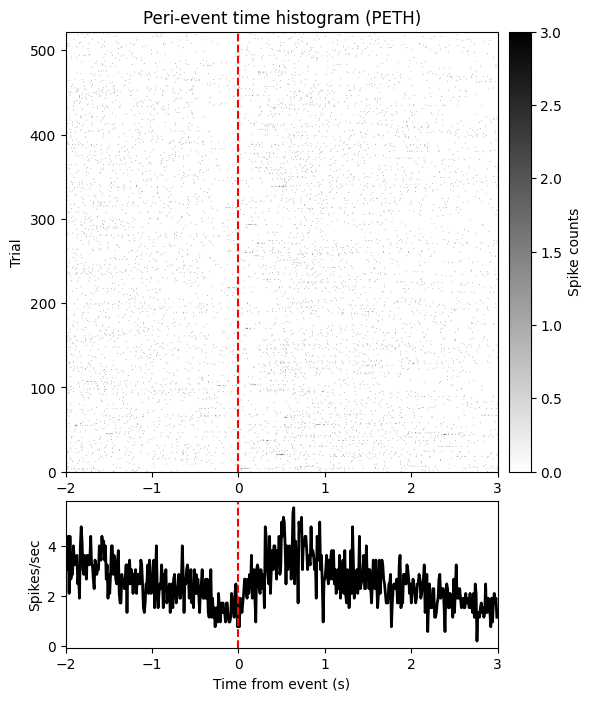

In [11]:
spikes.plot_peth(peth)

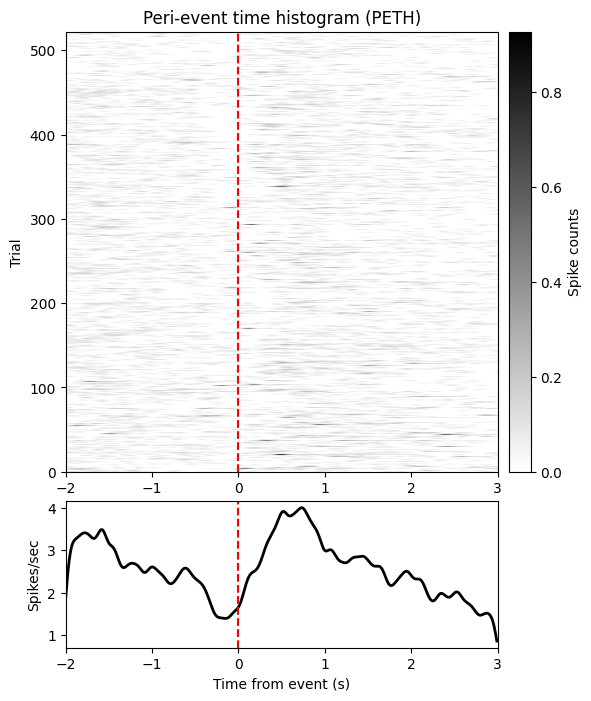

In [12]:
peth_smooth = spikes.compute_peth_smooth(peth, sigma_sec=0.05)
spikes.plot_peth(peth_smooth)

(-1.0, 2.0)

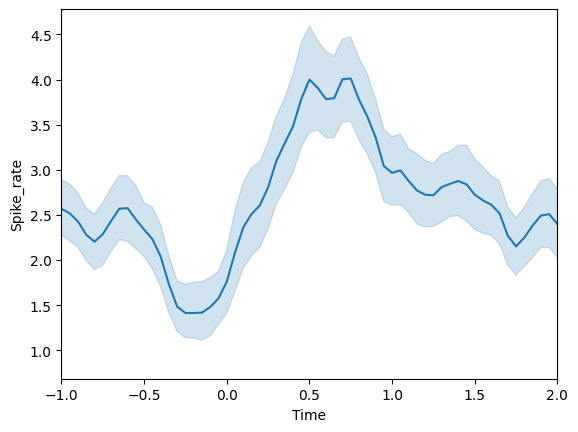

In [13]:
unit_id = unit_ids[100]
event_time = behv_time['choice']
spike_time = sorting.get_unit_spike_train(unit_id=unit_id)/sampling_rate

peth = spikes.compute_peth_array(
    spike_times=spike_time,
    event_times=event_time,
    bin_size=0.05,
    time_window=[-2, 3])

peth_smooth = spikes.compute_peth_smooth(peth, sigma_sec=0.05)
peth_fr = spikes.compute_peth_fr(peth_smooth)

peth_df = spikes.peth_to_longdf(peth_fr)

sns.lineplot(
    data=peth_df, 
    x='Time', 
    y='Spike_rate', 
)
plt.xlim([-1, 2])

In [14]:
trial_target = trials[['Trial', 'Stim', 'Choice', 'Correct']].dropna()
df = peth_df.merge(trial_target, on='Trial', how='left')
df

,Time,Trial,Spike_rate,Stim,Choice,Correct
0,-2.00,1,0.000000,right,right,True
1,-1.95,1,0.000000,right,right,True
2,-1.90,1,0.000000,right,right,True
3,-1.85,1,0.000000,right,right,True
4,-1.80,1,0.000000,right,right,True
...,...,...,...,...,...,...
52195,2.75,522,1.079823,right,right,True
52196,2.80,522,4.839429,right,right,True
52197,2.85,522,7.978869,right,right,True
52198,2.90,522,4.839429,right,right,True


(-1.0, 3.0)

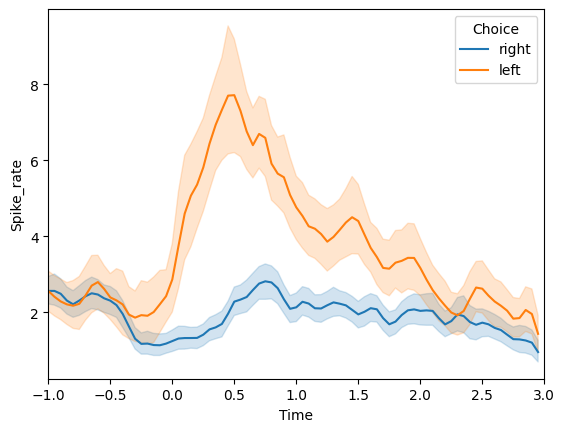

In [15]:
sns.lineplot(
    data=df, 
    x='Time', 
    y='Spike_rate',
    hue='Choice',
)
plt.xlim([-1, 3])

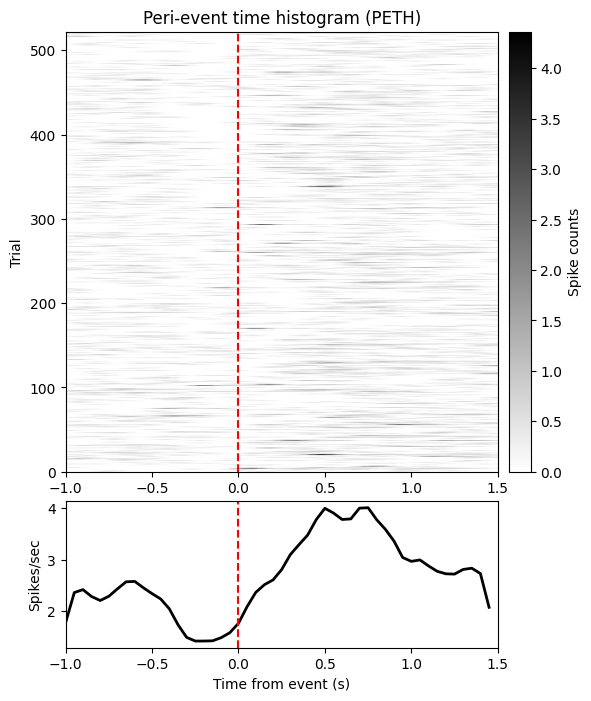

<Axes: xlabel='Time', ylabel='Spike_rate'>

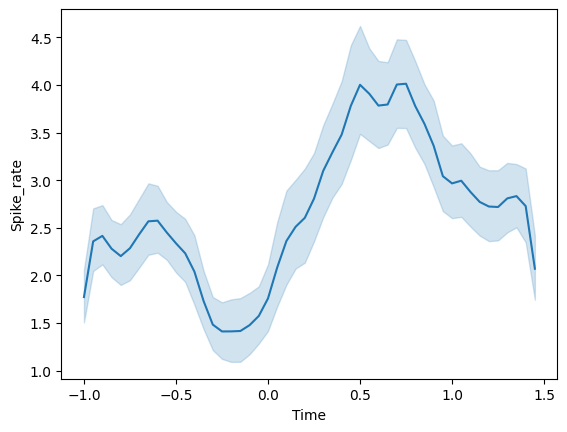

In [67]:
unit_id = unit_ids[100]
event_time = behv_time['choice']
spike_time = sorting.get_unit_spike_train(unit_id=unit_id)/sampling_rate

peth = spikes.compute_peth_array(
    spike_times=spike_time,
    event_times=event_time,
    bin_size=0.05,
    time_window=[-1, 1.5])

peth_smooth = spikes.compute_peth_smooth(peth, sigma_sec=0.05)
peth_fr = spikes.compute_peth_fr(peth_smooth)
peth_df = spikes.peth_to_longdf(peth_fr)

spikes.plot_peth(peth_smooth)
sns.lineplot(
    data=peth_df, 
    x='Time', 
    y='Spike_rate', 
)


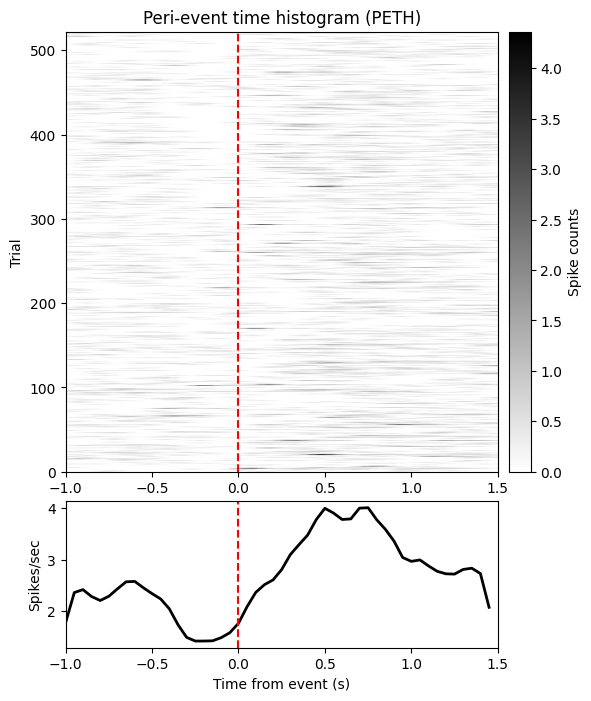

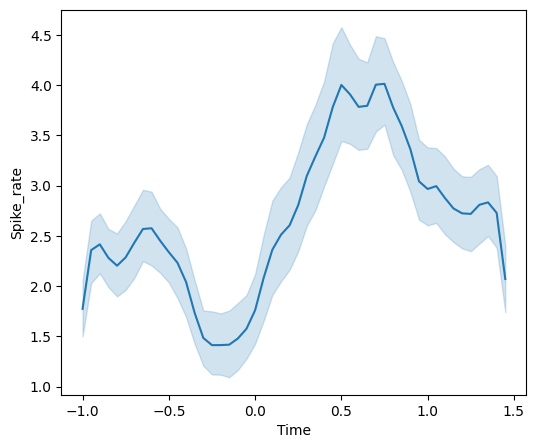

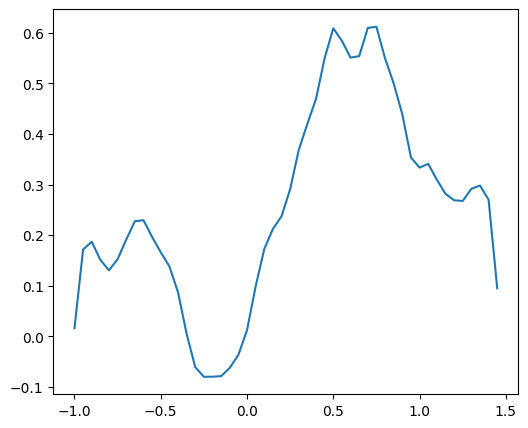

In [ ]:
unit_id = unit_ids[100]
event_time = behv_time['choice']
spike_time = sorting.get_unit_spike_train(unit_id=unit_id)/sampling_rate

peth = spikes.compute_peth_array(
    spike_times=spike_time,
    event_times=event_time,
    bin_size=0.05,
    time_window=[-1, 1.5])

peth_smooth = spikes.compute_peth_smooth(peth, sigma_sec=0.05)
peth_fr = spikes.compute_peth_fr(peth_smooth)
peth_df = spikes.peth_to_longdf(peth_fr)

spikes.plot_peth(peth_smooth)

plt.figure(figsize=(6, 5))
sns.lineplot(
    data=peth_df, 
    x='Time', 
    y='Spike_rate', 
)


# Compute z-score of spike rate
avg = peth_df.loc[(peth_df['Time']>=-0.5) & (peth_df['Time']<0), 'Spike_rate'].mean()
std = peth_df.loc[(peth_df['Time']>=-0.5) & (peth_df['Time']<0), 'Spike_rate'].std()

bins = peth_fr['bins']
spks = peth_fr['spike_rate']
z_score = (spks-avg)/std

plt.figure(figsize=(6, 5))
sns.lineplot(
    x=bins[0:-1],
    y=z_score.mean(axis=0),
)

In [ ]:
# Function to compute z-score from PETH DataFrame
def compute_z_score(event_time, spike_time):

    peth = spikes.compute_peth_array(
        spike_times=spike_time,
        event_times=event_time,
        bin_size=0.05,
        time_window=[-1, 1.5])

    peth_smooth = spikes.compute_peth_smooth(peth, sigma_sec=0.05)
    peth_fr = spikes.compute_peth_fr(peth_smooth)
    peth_df = spikes.peth_to_longdf(peth_fr)

    # Compute z-score of spike rate
    avg = peth_df.loc[(peth_df['Time']>=-0.5) & (peth_df['Time']<0), 'Spike_rate'].mean()
    std = peth_df.loc[(peth_df['Time']>=-0.5) & (peth_df['Time']<0), 'Spike_rate'].std()

    bins = peth_fr['bins']
    spks = peth_fr['spike_rate']
    z_score = (spks-avg)/std
    
    # Filter
    tf = (bins[0:-1]>=0)&(bins[0:-1]<1)
    z_score_target = z_score[:, tf]
    
    
    return z_score_target.mean(axis=0)

In [109]:
col_length = 20  # Number of bins in the PETH
z_score_stim = np.zeros((len(unit_ids), col_length))
z_score_choice = np.zeros((len(unit_ids), col_length))
z_score_outcome = np.zeros((len(unit_ids), col_length))

# Compute z-score for each unit and event type
for i in range(0, len(unit_ids)):
    unit_id = unit_ids[i]
    spike_time = sorting.get_unit_spike_train(unit_id=unit_id)/sampling_rate
    
    event_time = behv_time['stim']
    z_score_stim[i, :] = compute_z_score(event_time, spike_time)
    
    event_time = behv_time['choice']
    z_score_choice[i, :] = compute_z_score(event_time, spike_time)
    
    event_time = behv_time['outcome']
    z_score_outcome[i, :] = compute_z_score(event_time, spike_time)
    
    if i % 10 == 0:
        print(f'Unit {i+1}/{len(unit_ids)}')


Unit 1/382
Unit 101/382
Unit 201/382
Unit 301/382


In [ ]:
tunning_vector = np.concat([z_score_stim, z_score_choice, z_score_outcome], axis=1)

In [120]:
from sklearn.decomposition import PCA
import pandas as pd

# Perform PCA with 20 components
pca = PCA(n_components=20)
pca_result = pca.fit_transform(tunning_vector)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Compute the cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Create a DataFrame to summarize PCA results
df_pca_info = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'ExplainedVariance': explained_variance_ratio,
    'CumulativeVariance': cumulative_variance
})

# Display the DataFrame
df_pca_info

,PC,ExplainedVariance,CumulativeVariance
0,PC1,0.502364,0.502364
1,PC2,0.213860,0.716224
2,PC3,0.152663,0.868887
3,PC4,0.050845,0.919732
4,PC5,0.023695,0.943427
5,PC6,0.018095,0.961523
6,PC7,0.010721,0.972244
7,PC8,0.006142,0.978386
8,PC9,0.004556,0.982942
9,PC10,0.003739,0.986681


In [183]:
# k-means clustering
from sklearn.cluster import KMeans

# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=20, random_state=0).fit(pca_result)

# Get cluster labels for each sample
cluster_labels = kmeans.labels_

# Show the labels
df = pd.DataFrame({
    'UnitID': unit_ids,
    'Cluster': cluster_labels
})
df

,UnitID,Cluster
0,4,16
1,5,16
2,8,3
3,11,5
4,13,7
...,...,...
377,674,3
378,677,11
379,682,0
380,694,19


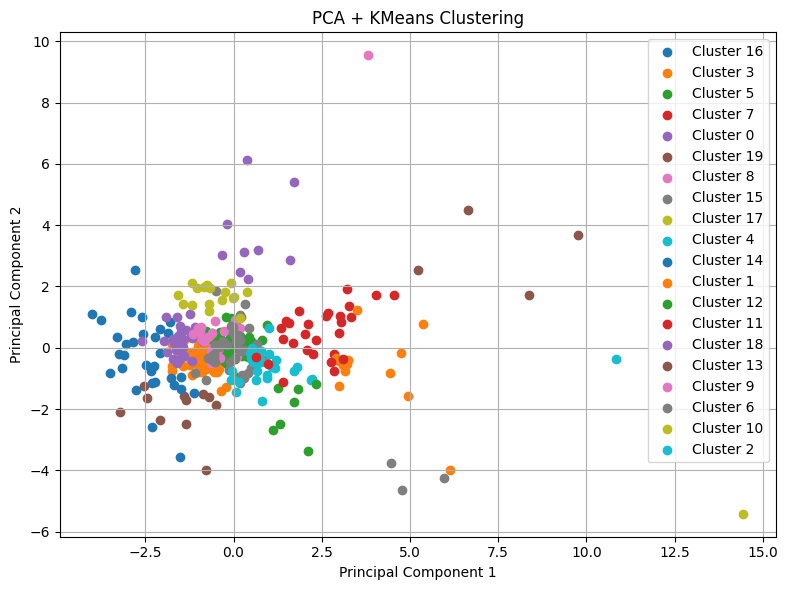

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame from the first 2 PCA components
pca_info = pd.DataFrame(pca_result[:, :2], columns=['PC1', 'PC2'])

# Add cluster labels
pca_info['Cluster'] = kmeans.labels_

# Plot
plt.figure(figsize=(8, 6))
for cluster_id in pca_info['Cluster'].unique():
    cluster_data = pca_info[pca_info['Cluster'] == cluster_id]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_id}')

plt.title('PCA + KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

   unit_id phase  time     value
0        0  stim   0.0  0.014109
1        1  stim   0.0  0.022190
2        2  stim   0.0  0.040308
3        3  stim   0.0 -0.038524
4        4  stim   0.0  0.090995


<Axes: xlabel='time', ylabel='value'>

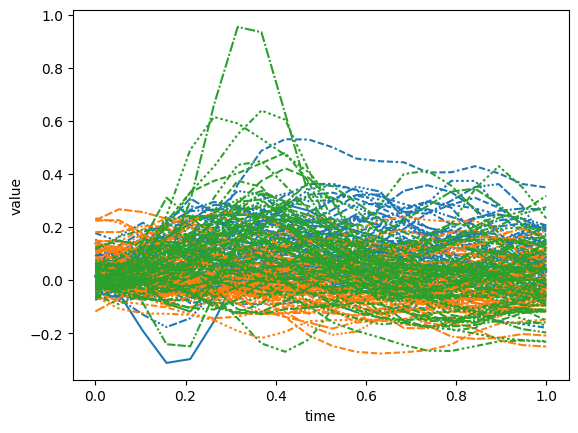

In [188]:
cluster_id = 5
# Get indices of units belonging to this cluster
idx = np.where(cluster_labels == cluster_id)[0]

# Select tuning vectors for those units
cluster_vectors = tunning_vector[idx]

bin_num = 20
time_points = np.linspace(0, 1, bin_num)
phase_dfs = []
phases = ['stim', 'choice', 'outcome']

# Loop through each phase and process the corresponding 20 columns
for i, phase in enumerate(phases):
    start = i * bin_num           # e.g., 0, 20, 40
    end = start + bin_num         # e.g., 20, 40, 60

    # Extract the 20 columns for this phase
    df_part = pd.DataFrame(cluster_vectors[:, start:end])
    df_part['unit_id'] = df_part.index  # Add unit ID column

    # Convert to long format: one row per (unit, time bin)
    df_long = df_part.melt(id_vars='unit_id', var_name='bin', value_name='value')

    # Assign time values to each bin (bin is 0–19 repeated for each unit)
    df_long['time'] = df_long['bin'].astype(int).map(dict(enumerate(time_points)))

    # Add the phase label (stim, button, reward)
    df_long['phase'] = phase

    # Reorder columns for clarity
    df_long = df_long[['unit_id', 'phase', 'time', 'value']]

    # Store for later merging
    phase_dfs.append(df_long)

# Combine all three phases into one DataFrame
df_all_long = pd.concat(phase_dfs, ignore_index=True)

# Preview the final result
print(df_all_long.head())


# 表示
sns.lineplot(
    data=df_all_long, 
    x='time', 
    y='value', 
    hue='phase',
    style='unit_id',
    estimator=np.mean,
    errorbar='se',
    legend=False
)

   unit_id phase  time     value
0        0  stim   0.0  0.016111
1        1  stim   0.0 -0.237060
2        2  stim   0.0 -0.012706
3        3  stim   0.0  0.014109
4        4  stim   0.0  0.087979


C:\Users\Sugimoto\AppData\Local\Temp\ipykernel_36948\4031003196.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


<Axes: xlabel='time', ylabel='value'>

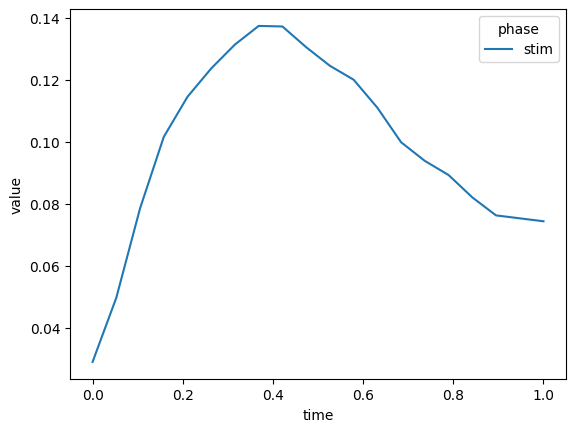

In [160]:
# 0–1秒を20分割した時間軸
time_points = np.linspace(0, 1, 20)

# 最初の20列（stim）
df_stim = pd.DataFrame(tunning_vector[:, :20])
df_stim['unit_id'] = df_stim.index

# 縦長に変換（long-format）
df_long = df_stim.melt(id_vars='unit_id', var_name='bin', value_name='value')

# 時間列を追加（binは0〜19が繰り返されるので、それをtimeに変換）
df_long['time'] = df_long['bin'].astype(int).map(dict(enumerate(time_points)))

# phase列を追加（すべてstim）
df_long['phase'] = 'stim'

# 整理
df_long = df_long[['unit_id', 'phase', 'time', 'value']]

# 表示
print(df_long.head())
# 表示
sns.lineplot(
    data=df_long, 
    x='time', 
    y='value', 
    hue='phase', 
    ci=None
)